# なぜ相関だけでは不十分で、コピュラが必要なのか

Dataset 1 correlation: 0.680
Dataset 2 correlation: 0.702


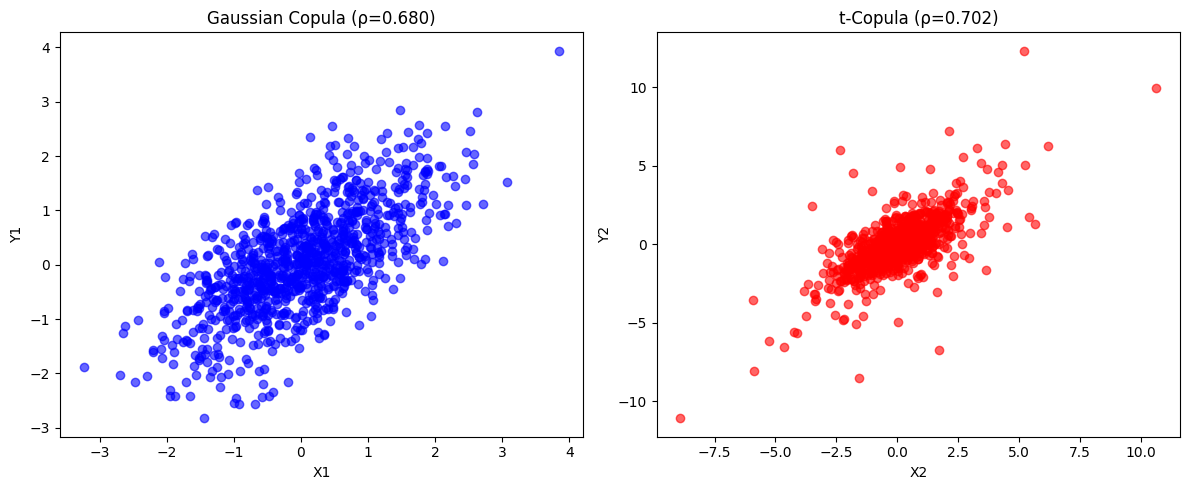


極端なイベントの同時発生:
Gaussian Copula: 9件
t-Copula: 77件
差: 68件（t-コピュラの方が危機時の同時発生が多い）


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# 同じ相関だが異なる依存構造のデータを生成
np.random.seed(42)

# データセット1: 正規分布（ガウシアンコピュラ）
x1 = np.random.normal(0, 1, 1000)
y1 = 0.7 * x1 + 0.71 * np.random.normal(0, 1, 1000)

# データセット2: 裾が重い分布（t-コピュラ）
from scipy.stats import multivariate_t
t_samples = multivariate_t.rvs([0, 0], [[1, 0.7], [0.7, 1]], df=3, size=1000)
x2, y2 = t_samples[:, 0], t_samples[:, 1]

# 相関係数を確認
corr1 = np.corrcoef(x1, y1)[0,1]
corr2 = np.corrcoef(x2, y2)[0,1]

print(f"Dataset 1 correlation: {corr1:.3f}")
print(f"Dataset 2 correlation: {corr2:.3f}")

# 散布図で違いを確認
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x1, y1, alpha=0.6, color='blue')
ax1.set_title(f'Gaussian Copula (ρ={corr1:.3f})')
ax1.set_xlabel('X1')
ax1.set_ylabel('Y1')

ax2.scatter(x2, y2, alpha=0.6, color='red')
ax2.set_title(f't-Copula (ρ={corr2:.3f})')
ax2.set_xlabel('X2')
ax2.set_ylabel('Y2')

plt.tight_layout()
plt.show()

# 極端な値の同時発生頻度が違う！
extreme_1 = np.sum((np.abs(x1) > 2) & (np.abs(y1) > 2))
extreme_2 = np.sum((np.abs(x2) > 2) & (np.abs(y2) > 2))

print(f"\n極端なイベントの同時発生:")
print(f"Gaussian Copula: {extreme_1}件")
print(f"t-Copula: {extreme_2}件")
print(f"差: {extreme_2 - extreme_1}件（t-コピュラの方が危機時の同時発生が多い）")

# ガウシアンコピュラの実装

In [ ]:
from scipy.stats import multivariate_normal, norm
from copulas.multivariate import GaussianMultivariate

# ガウシアンコピュラの手動実装（理解のため）(通常はライブラリを使う)
def gaussian_copula_density(u, v, rho):
    """
    ガウシアンコピュラの密度関数
    u, v: [0,1]の一様分布値
    rho: 相関パラメータ
    """
    # 一様分布値を正規分布の分位数に変換
    x = norm.ppf(u)
    y = norm.ppf(v)
    
    # 二変量正規分布の密度
    cov_matrix = [[1, rho], [rho, 1]]
    joint_density = multivariate_normal.pdf([x, y], [0, 0], cov_matrix)
    marginal_density = norm.pdf(x) * norm.pdf(y)
    
    # コピュラ密度 = 結合密度 / 周辺密度
    return joint_density / marginal_density

# ガウシアンコピュラの累積分布関数
def gaussian_copula_cdf(u, v, rho):
    """ガウシアンコピュラの累積分布関数"""
    x = norm.ppf(u)
    y = norm.ppf(v)
    return multivariate_normal.cdf([x, y], [0, 0], [[1, rho], [rho, 1]])

# テスト用データ
u_test = np.array([0.1, 0.5, 0.9])
v_test = np.array([0.2, 0.5, 0.8])
rho_test = 0.7

print("ガウシアンコピュラのテスト:")
print("u\tv\tdensity\tcdf")
for i in range(len(u_test)):
    density = gaussian_copula_density(u_test[i], v_test[i], rho_test)
    cdf = gaussian_copula_cdf(u_test[i], v_test[i], rho_test)
    print(f"{u_test[i]}\t{v_test[i]}\t{density:.3f}\t{cdf:.3f}")

ガウシアンコピュラのテスト:
u	v	density	cdf
0.1	0.2	1.989	0.069
0.5	0.5	1.400	0.373
0.9	0.8	1.989	0.769
